In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="progress: ")

pd.set_option("max_columns",100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  import sys
/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
DIR = "../input/20201115at/"

train = pd.read_csv(DIR+"train.csv")
test = pd.read_csv(DIR+"test.csv")
video = pd.read_csv(DIR+"advertiser_video.csv")
map_game_feed_native_video_assets = pd.read_csv(DIR+'map_game_feed_native_video_assets.csv')
advertiser_converted_video = pd.read_csv(DIR+'advertiser_converted_video.csv')
advertiser_video = pd.read_csv(DIR+'advertiser_video.csv')
campaign = pd.read_csv(DIR+'campaign.csv')

# train & test

In [3]:
train["imp_at"] = pd.to_datetime(train["imp_at"])
test["imp_at"] = pd.to_datetime(test["imp_at"])

In [4]:
train.target.mean()

0.03278442326898095

In [5]:
train["month"] = train["imp_at"].dt.month

In [6]:
train[train.target==1].head(40)

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,month
91,3f5c876546c53150953d,2020-04-28 01:30:17.622,1,28,1081,2.0,e966db3d5806a7a6d9ea,6ff54017fb141ad41c5f,2.0,25d1399ffca5d5d8dc96,0,2020-04-28 18:41:30.565000,JP,2020-04-29 06:24:12.974000,134109.0,1,1,4,a3e3c0f04fcbf76d3ab9,NaN,0.0,1.0,NaN,NaN,17222.0,127483.0,2.0,37385.0,529685e9730b64569eaa,2,10.0.0,1,b19e93cf395cbc133393,2,297ade72d5f1e9ed6e2f,4
92,db9f4b1699b3d694c0ba,2020-04-28 01:31:19.167,1,8,1113,2.0,3b268c079f67cb109105,c72faf7a97213d7e4c8c,1.0,70e97a15ca4bae2008f4,0,2020-04-28 01:31:29.146000,JP,2020-04-29 00:55:34.484000,828551.0,0,0,4,644a3898cb5b406f7364,NaN,NaN,1.0,NaN,NaN,2112.0,2100.0,3.0,75940.0,84a2cff85228c12b0e6a,1,13.3.1,0,5ab1afdbd17437bc3a33,1,297ade72d5f1e9ed6e2f,4
119,ef004771f0b19749a25a,2020-04-28 01:45:37.623,1,20,1064,1.0,0aaa2635cef6c96c7932,cc2106c53126f6d113c8,2.0,6ff50d963ec504f89388,0,2020-04-28 01:45:49.381000,JP,2020-04-29 01:36:36.610000,342087.0,0,0,4,1e11298d4345306a858c,NaN,NaN,1.0,NaN,NaN,1055.0,83350.0,7.0,19428.0,161e49b8c9391ca6041c,2,8.1.0,1,1dc1f4bf5c91d3df2c5b,2,b5401899f2db8ce48d43,4
136,6870fa8852497b464232,2020-04-28 02:02:50.077,1,42,1123,3.0,02964ffd5d3855453ad2,fbfd0870ab61804fd377,1.0,47e53eb7fcf973f67370,0,2020-04-28 02:03:00.108000,JP,2020-04-29 01:00:12.268000,266163.0,7,0,4,77fe54360974611735b6,953c7610a60e2543c073,NaN,NaN,39715.0,NaN,15645.0,NaN,3.0,18023.0,b1d6cf11fb08fc33c61d,1,13.2.3,0,04c945a8a58c69c7aac2,1,NaN,4
153,075f2a8ba5fbeedf2019,2020-04-28 02:16:35.240,1,42,1123,3.0,ba2bb260d8eccd0057a4,38ec940925824f7ba9c4,1.0,83b13bab027d6887b44f,0,2020-04-28 02:16:41.235000,JP,2020-04-29 01:36:00.748000,157582.0,0,0,4,b2a55e89f560f0bd5324,953c7610a60e2543c073,NaN,NaN,79895.0,NaN,17396.0,18555.0,2.0,35699.0,7cc4823b038e178f1000,1,13.3.1,0,128c9b56e0994b8afcad,1,NaN,4
156,df606e48303c7e2a0a59,2020-04-28 02:18:10.084,1,27,1073,3.0,e966db3d5806a7a6d9ea,a293916421f59ddde73d,1.0,065881cd4508b6930341,0,2020-04-28 02:18:20.515000,JP,2020-04-29 01:39:47.968000,181375.0,1,0,4,a3e3c0f04fcbf76d3ab9,953c7610a60e2543c073,0.0,NaN,80156.0,NaN,16537.0,65634.0,2.0,19324.0,272a5b9be7b93cb8e3e7,1,13.3.1,0,3b193c380abb17ddf0fd,1,NaN,4
228,b92a41206c23c45cee90,2020-04-28 02:57:03.573,1,42,1123,3.0,677c257464b397b14d5a,afc91dc6f54d3e4c1057,1.0,6ece5f007cf37f5a812e,0,2020-04-28 02:57:08.439000,JP,2020-04-29 02:28:25.985000,202333.0,0,0,4,19c5e4d4bb52c3b8a301,953c7610a60e2543c073,NaN,NaN,80027.0,NaN,20301.0,79424.0,1.0,59124.0,019ea4b1b482b541a8ab,1,13.3.1,0,416edf79e53dbe826d3f,1,NaN,4
259,d5ae72fa200441056ce7,2020-04-28 03:07:09.168,1,28,1081,1.0,96f535d9bf2112bfc5ac,d37b5924f415f704abb3,2.0,a8a0de96be097c41feb9,0,2020-04-28 03:07:14.378000,JP,2020-04-29 01:58:08.585000,564580.0,3,1,4,49515372d656f3d76f06,NaN,0.0,1.0,NaN,NaN,18719.0,19544.0,1.0,545033.0,c6f63def0a283b3bf9ae,1,13.3.1,1,92080012bccd0ec3faed,1,297ade72d5f1e9ed6e2f,4
350,189fe47d5137d8c72774,2020-04-28 03:30:18.602,1,26,1069,3.0,d352ebd3462849796754,NaN,1.0,4571755e1d29efb19a17,0,2020-04-28 03:30:31.931000,JP,2020-04-29 00:12:54.251000,1069137.0,3,0,4,5dd3242e3a1bb99f905a,NaN,NaN,0.0,NaN,NaN,10913.0,40299.0,1.0,133586.0,NaN,2,9,1,55a3770ed6571598344b,2,NaN,4
367,9b4b82b649a182e6f67d,2020-04-28 03:34:30.308,1,42,1123,3.0,0aaa2635cef6c96c7932,e9e4c6c0c5fbc28285bc,1.0,6ff50d963ec504f89388,0,2020-04-29 12:51:35.195000,JP,2020-04-29 21:25:55.162000,486327.0,7,1,4,1210230ed0bc061eb1c5,953c7610a60e2543c073,NaN,NaN,80431.0,NaN,374.0,52209.0,10.0,18689.0,8d4f1d80aa05e50728b2,2,10,0,24e179bb74871550283e,2,NaN,4


In [7]:
train.head()

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,month
0,ad6a7b7894f142d81a1e,2020-04-28 00:04:14.639,0,4,1111,2.0,1b29c3959fc76425d130,efef8f05c293786ae95d,1.0,9ce932d55f27ed28f0e5,8497,2020-04-28 00:04:21.581000,JP,2020-04-29 00:04:05.618000,1490644.0,0,0,4,8371aa8713627e51023c,NaN,0.0,1.0,NaN,NaN,11320.0,29835.0,10.0,2607.0,NaN,1,13.3.1,0,30cfce348022c3812b3a,1,a96538aec6d5d90fd8d9,4
1,ac8453e4a93391812b78,2020-04-28 00:09:13.759,0,28,1081,2.0,ba2bb260d8eccd0057a4,85518c203c727a6fcd6e,2.0,23f7cf2bddc97c599ac4,0,2020-04-29 01:59:08.418000,JP,2020-04-29 10:23:18.079000,790412.0,2,1,4,b28c75eda0294ffd7924,NaN,0.0,1.0,NaN,NaN,12589.0,159596.0,2.0,13540.0,c3292411366546db2194,2,9.0.0,1,4c28854cab6a85c37dab,2,297ade72d5f1e9ed6e2f,4
2,4959adca0d9284e642c9,2020-04-28 00:09:14.708,0,42,1123,3.0,0aaa2635cef6c96c7932,d01b84105c697315f36d,1.0,2dde952bf6521fac0b71,0,2020-04-28 00:09:29.655000,JP,2020-04-29 00:08:42.200000,1506105.0,0,0,4,200c99de864be1a88010,953c7610a60e2543c073,NaN,NaN,80525.0,906634.0,10254.0,156643.0,9.0,33725.0,07514730ff1e69100233,1,12.1.2,0,b35f0cd7210c4273489c,1,NaN,4
3,622c44ebc7cf591d046e,2020-04-28 00:10:40.291,0,8,1113,2.0,1ed4e5bb950da757976a,c72faf7a97213d7e4c8c,1.0,1cbbcb2f33a045e5a09c,0,2020-04-28 00:10:50.270000,JP,2020-04-29 00:03:56.930000,184283.0,0,0,4,b98336c3d597f3d62202,NaN,NaN,1.0,NaN,NaN,39618.0,NaN,4.0,7377.0,84a2cff85228c12b0e6a,1,13.4.1,0,57dc1bf69be06dac416c,1,b5401899f2db8ce48d43,4
4,3093c6746ae6e35b9ad5,2020-04-28 00:11:45.895,0,22,1061,NaN,d352ebd3462849796754,0376415068bf3e5b9e95,4.0,84095859da9cffce1c60,0,2020-05-05 17:39:43.537000,JP,2020-05-05 23:56:19.105000,1999495.0,2,1,2,84ed0ed356eb339c6eaa,5f60f2a2df7efc8f339e,1.0,0.0,NaN,NaN,35652.0,1566749.0,5.0,164759.0,2fd1c330d5a47edc039b,1,12.4.5,0,7ca7b54b97093b084027,1,NaN,4


In [8]:
test.head()

,request_id,imp_at,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,country_code,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_login_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id
0,9747ce53a3cb6b71083d,2020-06-27 00:04:19.064,26,1069,3.0,f18c256a442a34e0b415,e2e4c7033fd8b771cbc9,1.0,68bf8df385e56d7c7224,0,JP,125284.0,2,0,4,8b94124cb457e78df93c,NaN,NaN,0.0,NaN,18279.0,1,31684.0,1dd7e16fec6017fdc4cc,1,13.5.1,1,d88dff8c67cbca5063b6,1,NaN
1,688ca2024829c392a509,2020-06-27 00:11:59.392,28,1081,1.0,1ed4e5bb950da757976a,39b1641c9aee267d6c8c,2.0,0b4017d3f3113de38ba6,0,JP,489271.0,0,1,4,63096db91899bdcb91f3,NaN,0.0,1.0,NaN,12665.0,1,224419.0,08c200079eb692fd93b8,2,8.0.0,1,ecb26d89e786f4710c62,2,69b22b4400be9d91e6cc
2,b0b8044a2428958ac17b,2020-06-27 00:14:09.341,28,1081,2.0,5b843a28e245912f51ca,483c546765bd610ab0e3,2.0,985dfa150be554b1714d,0,US,390685.0,1,1,4,1951ab4e1ad406da7f95,NaN,0.0,1.0,NaN,7521.0,5,16301.0,0860cd60ba0f3eef24d8,2,10.0.0,1,85e9de3b175557cf577f,2,297ade72d5f1e9ed6e2f
3,6b9bb6e4f70cad3a629a,2020-06-27 00:18:08.399,27,1073,3.0,1ed4e5bb950da757976a,65235845da2e07e67145,1.0,b3857c6735bc69ea932d,0,JP,76181.0,0,1,4,5e9fa5bdd5eb5ebbcecd,953c7610a60e2543c073,0.0,NaN,84033.0,64583.0,8,2701.0,43b7a628b6db774cc045,2,5.0.2,0,0bba4196f93ca1cdbc22,2,NaN
4,07234a3c7389cc36bc0e,2020-06-27 00:23:18.583,26,1069,3.0,1a71092d4f938588d1fd,c542bacba91a6b4b595f,1.0,8da6c586bd1089956477,8305,JP,244134.0,2,0,4,45884361e5d2f0985572,NaN,NaN,0.0,NaN,35453.0,1,53622.0,d0eab9db52e426309036,2,9,1,947fc17776732f10cc9e,2,NaN


In [9]:
train.shape, test.shape

((1997595, 36), (390095, 30))

In [10]:
set(train.columns) - set(test.columns)

{'click_or_view_at',
 'cv_at',
 'last_cv_interval',
 'last_paid_interval',
 'month',
 'target'}

In [11]:
train[['click_or_view_at','cv_at','last_cv_interval','last_paid_interval']]

,click_or_view_at,cv_at,last_cv_interval,last_paid_interval
0,2020-04-28 00:04:21.581000,2020-04-29 00:04:05.618000,NaN,29835.0
1,2020-04-29 01:59:08.418000,2020-04-29 10:23:18.079000,NaN,159596.0
2,2020-04-28 00:09:29.655000,2020-04-29 00:08:42.200000,906634.0,156643.0
3,2020-04-28 00:10:50.270000,2020-04-29 00:03:56.930000,NaN,NaN
4,2020-05-05 17:39:43.537000,2020-05-05 23:56:19.105000,NaN,1566749.0
...,...,...,...,...
1997590,2020-05-28 23:59:02.501000,2020-05-28 23:59:36.479000,NaN,23122.0
1997591,2020-05-28 23:59:12.980000,2020-05-28 23:59:47.289000,NaN,435701.0
1997592,2020-05-28 23:59:16.015000,2020-05-28 23:59:19.808000,NaN,NaN
1997593,2020-05-28 23:59:24.167000,2020-05-28 23:59:59.906000,NaN,NaN


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997595 entries, 0 to 1997594
Data columns (total 36 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   request_id               object        
 1   imp_at                   datetime64[ns]
 2   target                   int64         
 3   adnw_id                  int64         
 4   adspot_id                int64         
 5   adspot_video_format_id   float64       
 6   advertiser_id            object        
 7   app_id                   object        
 8   auction_type_id          float64       
 9   campaign_id              object        
 10  category_id              int64         
 11  click_or_view_at         object        
 12  country_code             object        
 13  cv_at                    object        
 14  first_login_interval     float64       
 15  frequency                int64         
 16  from_click               int64         
 17  game_feed_asset_type_id  in

In [13]:
train.isnull().sum()

request_id                       0
imp_at                           0
target                           0
adnw_id                          0
adspot_id                        0
adspot_video_format_id      191548
advertiser_id                    0
app_id                       55492
auction_type_id              13367
campaign_id                      0
category_id                      0
click_or_view_at                 0
country_code                   844
cv_at                            0
first_login_interval           479
frequency                        0
from_click                       0
game_feed_asset_type_id          0
game_feed_id                     0
game_template_id           1170226
header_bidding              816537
is_interstitial             645181
item_id                    1337766
last_cv_interval           1961438
last_login_interval            479
last_paid_interval         1145927
login_frequency                 69
max_login_interval           29962
media_app_id        

In [14]:
test.isnull().sum()

request_id                      0
imp_at                          0
adnw_id                         0
adspot_id                       0
adspot_video_format_id      41261
advertiser_id                   0
app_id                      14112
auction_type_id              1516
campaign_id                     0
category_id                     0
country_code                  526
first_login_interval          337
frequency                       0
from_click                      0
game_feed_asset_type_id         0
game_feed_id                    0
game_template_id           204050
header_bidding             219817
is_interstitial            147102
item_id                    234040
last_login_interval           337
login_frequency                 0
max_login_interval           7529
media_app_id                14783
os                              0
os_version                      4
pos                             0
uid                             0
user_type_id                    0
video_template

In [15]:
print(len(train.uid.unique()))
print(len(test.uid.unique()))
len(set(train.uid.unique()) & set(test.uid.unique()))

1215039
327517


108518

In [16]:
train.uid.value_counts()

d429410d7af75ca0fe20    339
5eabd714187e3e56f39f    233
14c3e5840f048fdfa431    180
a1086428fa3823aeaa11    165
a363c0b305891a581241    150
                       ... 
8cbdc13a88c10dccddc7      1
7f7133678721ad04c37e      1
c406c15bb4928d057e73      1
120d972225006a73bc05      1
461599150df64e18dcc1      1
Name: uid, Length: 1215039, dtype: int64

In [17]:
test.uid.value_counts()

56927e802648d92c13a9    51
14c3e5840f048fdfa431    51
446e66391de0ac590e1c    37
18476a1c1d70ab549965    34
01debb312ed105fa3226    34
                        ..
78b55b84edacc84a3799     1
3197a69772d11ef65440     1
663d74b26241165f1267     1
c9a5fd741ccdd41c34a3     1
785acb12f52efe7cd400     1
Name: uid, Length: 327517, dtype: int64

In [18]:
tmp = train[train.uid=="14c3e5840f048fdfa431"].copy()
# cumsum from click by uid
tmp1 = tmp.groupby(['uid'])['target'].progress_apply(lambda x: pd.concat([pd.DataFrame([0]), x.cumsum()[:-1]])).reset_index(drop=True).values
tmp1 = np.array(tmp1, dtype=float)
# cumsum total num by uid
tmp2 = tmp.groupby(['uid']).cumcount().values
tmp2 = np.array(tmp2, dtype=float).reshape(-1,1)
# https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
target_mean = np.divide(tmp1, tmp2, out=np.ones_like(tmp1)*-1, where=tmp2!=0)

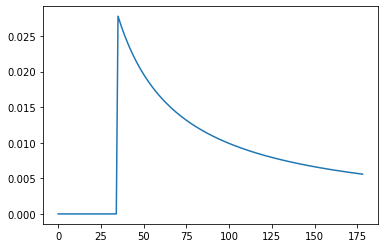

In [19]:
plt.plot(np.arange(len(target_mean[1:])), target_mean[1:])

In [20]:
tmp.head(40)

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,month
11912,760c04f6730f0adfc82b,2020-04-28 17:09:59.729,0,28,1081,2.0,3b268c079f67cb109105,ed1bee912764f4d9066c,1.0,70e97a15ca4bae2008f4,0,2020-04-28 17:10:09.829000,JP,2020-04-29 00:20:25.926000,814641.0,0,0,4,672a20af7ab806138fc7,NaN,1.0,1.0,NaN,NaN,29.0,12.0,10.0,36946.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,69b22b4400be9d91e6cc,4
30309,06d734ffe8378bfbda57,2020-04-29 02:19:23.199,0,28,1081,2.0,fd990a248b55c7b79931,ed1bee912764f4d9066c,1.0,e305d4a2de6a4fffa58b,0,2020-04-29 02:19:33.440000,JP,2020-04-29 14:11:41.257000,741871.0,1,0,4,16912cdb21fccc4840e6,NaN,1.0,1.0,NaN,NaN,113.0,26495.0,10.0,37016.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,69b22b4400be9d91e6cc,4
30336,a77bb41ae45862ceecb0,2020-04-29 02:19:46.443,0,28,1081,2.0,b3776d2434d4de789cc6,ed1bee912764f4d9066c,1.0,0945dcf9420eac81140b,0,2020-04-29 02:19:56.598000,JP,2020-04-29 14:10:52.308000,812670.0,4,0,4,36867b0672dd71161f65,NaN,1.0,1.0,NaN,NaN,578.0,203767.0,10.0,37017.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,e3f5663bc1e2e5cc282e,4
86640,d9b4995aca9c03e80a01,2020-04-29 16:42:26.472,0,28,1081,2.0,b3776d2434d4de789cc6,ed1bee912764f4d9066c,1.0,0945dcf9420eac81140b,0,2020-04-29 16:42:40.881000,JP,2020-04-29 16:52:04.624000,813532.0,1,1,4,4ad7251617e026b24142,NaN,1.0,1.0,NaN,NaN,151.0,204630.0,10.0,37017.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,e3f5663bc1e2e5cc282e,4
96399,1f9042cf14512bbf4564,2020-04-29 21:39:55.488,0,28,1081,2.0,b3776d2434d4de789cc6,ed1bee912764f4d9066c,1.0,0945dcf9420eac81140b,0,2020-04-29 21:40:05.624000,JP,2020-04-30 09:54:59.159000,813817.0,9,0,4,36867b0672dd71161f65,NaN,1.0,1.0,NaN,NaN,29.0,204914.0,10.0,37017.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,297ade72d5f1e9ed6e2f,4
170152,aef2f3a5c50bbf0ec702,2020-04-30 20:22:25.890,0,28,1081,2.0,fd990a248b55c7b79931,ed1bee912764f4d9066c,1.0,e305d4a2de6a4fffa58b,0,2020-04-30 20:22:36.008000,JP,2020-05-01 02:23:36.798000,744360.0,2,0,4,16912cdb21fccc4840e6,NaN,1.0,1.0,NaN,NaN,382.0,28984.0,10.0,37016.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,e3f5663bc1e2e5cc282e,4
187556,54222e8d08d3604b7615,2020-05-01 02:01:34.212,0,28,1081,2.0,3b268c079f67cb109105,ed1bee912764f4d9066c,1.0,70e97a15ca4bae2008f4,0,2020-05-01 02:01:44.213000,JP,2020-05-01 02:23:57.798000,818053.0,0,0,4,672a20af7ab806138fc7,NaN,1.0,1.0,NaN,NaN,756.0,3423.0,10.0,36946.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,b5401899f2db8ce48d43,5
187818,9f17ae58bd4ade15c587,2020-05-01 02:05:52.052,0,28,1081,2.0,b3776d2434d4de789cc6,ed1bee912764f4d9066c,1.0,0945dcf9420eac81140b,0,2020-05-01 02:06:02.129000,JP,2020-05-01 02:24:15.678000,815536.0,8,0,4,4ad7251617e026b24142,NaN,1.0,1.0,NaN,NaN,760.0,206633.0,10.0,37017.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,e3f5663bc1e2e5cc282e,5
223567,f74fd73cc69895ce0442,2020-05-01 11:08:31.270,0,28,1081,2.0,b3776d2434d4de789cc6,ed1bee912764f4d9066c,1.0,0945dcf9420eac81140b,0,2020-05-01 11:08:41.171000,JP,2020-05-01 11:15:30.497000,816032.0,4,0,4,36867b0672dd71161f65,NaN,1.0,1.0,NaN,NaN,23.0,207130.0,10.0,37017.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,b5401899f2db8ce48d43,5
230630,3d114f859d3fbae54284,2020-05-01 12:27:26.305,0,28,1081,2.0,3b268c079f67cb109105,ed1bee912764f4d9066c,1.0,70e97a15ca4bae2008f4,0,2020-05-01 12:27:36.298000,JP,2020-05-01 12:47:18.731000,818679.0,0,0,4,672a20af7ab806138fc7,NaN,1.0,1.0,NaN,NaN,72.0,4049.0,10.0,36946.0,53a7d0444ea8d8f05f52,1,13.3.1,1,14c3e5840f048fdfa431,1,69b22b4400be9d91e6cc,5


In [21]:
# request id
print(len(train.request_id.unique()), len(test.request_id.unique())) # 全て独自のid
set(train.request_id.unique()) & set(test.request_id.unique()) # request_idに被りなし

1997595 390095


set()

In [22]:
train0 = train[train.target==0].copy()
train1 = train[train.target==1].copy()

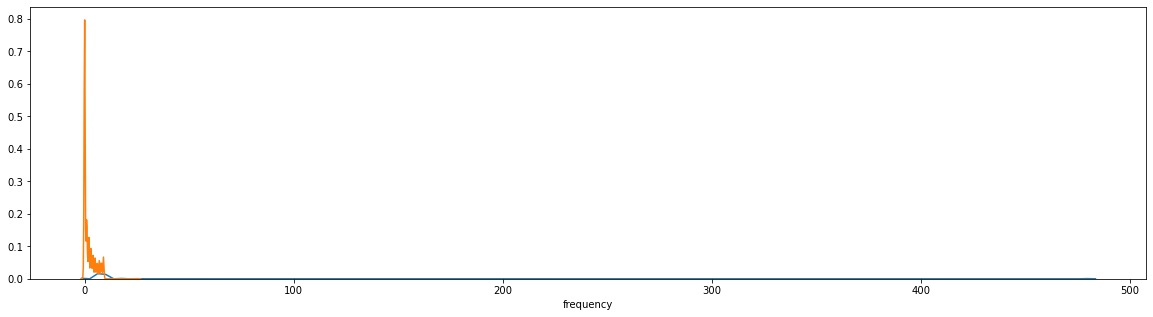

In [23]:
plt.figure(figsize=(20,5))
sns.distplot(train0["frequency"], hist=False)
sns.distplot(train1["frequency"], hist=False)

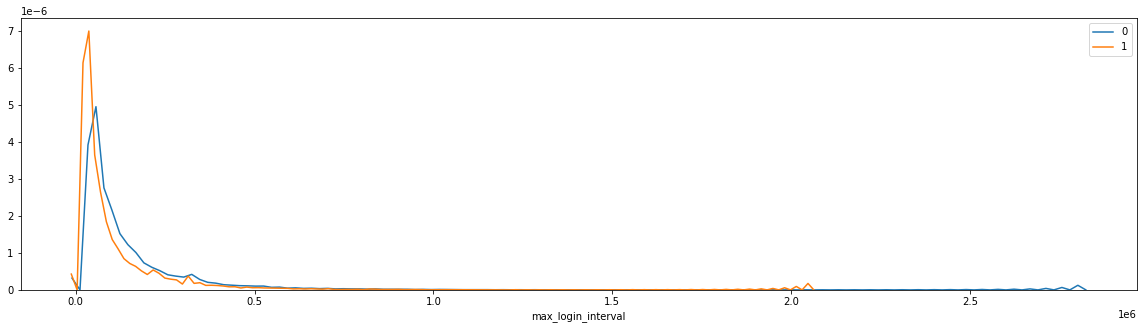

In [24]:
plt.figure(figsize=(20,5))
sns.distplot(train0["max_login_interval"], hist=False, label="0")
sns.distplot(train1["max_login_interval"], hist=False, label="1")

In [25]:
train["count"] = 1

## imp_at

In [26]:
train["imp_at"] = pd.to_datetime(train["imp_at"])
test["imp_at"] = pd.to_datetime(test["imp_at"])

In [27]:
set(train.imp_at.unique()) & set(test.imp_at.unique()) # request_idに被りなし

set()

In [28]:
train.imp_at

0         2020-04-28 00:04:14.639
1         2020-04-28 00:09:13.759
2         2020-04-28 00:09:14.708
3         2020-04-28 00:10:40.291
4         2020-04-28 00:11:45.895
                    ...          
1997590   2020-05-28 23:58:55.869
1997591   2020-05-28 23:59:06.339
1997592   2020-05-28 23:59:15.434
1997593   2020-05-28 23:59:15.506
1997594   2020-05-28 23:59:18.281
Name: imp_at, Length: 1997595, dtype: datetime64[ns]

In [29]:
test.imp_at

0        2020-06-27 00:04:19.064
1        2020-06-27 00:11:59.392
2        2020-06-27 00:14:09.341
3        2020-06-27 00:18:08.399
4        2020-06-27 00:23:18.583
                   ...          
390090   2020-07-04 23:58:27.897
390091   2020-07-04 23:58:31.012
390092   2020-07-04 23:58:37.502
390093   2020-07-04 23:58:41.421
390094   2020-07-04 23:59:03.483
Name: imp_at, Length: 390095, dtype: datetime64[ns]

In [30]:
train.groupby(['uid']).cumcount().values

array([0, 0, 0, ..., 1, 0, 1])

In [31]:
train[train.frequency==-1]

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,month,count
4721,279bbbead54ed35b6b7a,2020-04-28 12:11:26.313,0,1,1070,NaN,9f4c76c88886efa49f72,ee2415da1f73e020c6b8,NaN,37f9d662aa2c9ce434ba,0,2020-04-28 12:14:35.516000,JP,2020-04-29 02:03:48.897000,75954.0,-1,1,2,e361bedf2b242ce808c6,5204520aa01acf0ec568,NaN,NaN,NaN,NaN,56459.0,NaN,2.0,13620.0,NaN,1,13.3,0,67cdeceb7a6d734d6a9e,1,NaN,4,1
5473,b9e598fa176d59b737e5,2020-04-28 12:51:00.494,0,1,1070,NaN,69cb331c58fcea55f995,ee2415da1f73e020c6b8,NaN,4cf2860d56c51c9b3497,0,2020-04-28 12:51:08.831000,JP,2020-04-29 09:37:37.039000,1623530.0,-1,1,2,bee249ca8631a3ffdd74,717f3f483ab917d3b77e,NaN,NaN,NaN,NaN,6167.0,NaN,9.0,47162.0,NaN,1,13.3.1,0,699fbdaac565e1872ab9,1,NaN,4,1
5916,de997a7cc416586ed4ed,2020-04-28 13:09:53.800,0,1,1070,NaN,619cee4ab9f56797a500,ee2415da1f73e020c6b8,NaN,e3f677fdd1e1b8dab7b1,0,2020-04-28 13:10:13.180000,JP,2020-04-29 04:26:48.179000,160629.0,-1,1,2,62533779864df32a6526,cb50f8398e8cc80f049f,NaN,NaN,NaN,NaN,902.0,92949.0,8.0,4909.0,NaN,1,13.3.1,0,64d94d59da2e630b53d1,1,NaN,4,1
6824,e8ae6235ae6f0267e54f,2020-04-28 13:45:23.591,0,1,1070,NaN,6ed2842c91c9de1a3623,25e86cebf820d8be363f,NaN,469f2de00de2298f2da6,0,2020-04-28 13:55:59.058000,JP,2020-04-29 10:06:17.220000,1614983.0,-1,1,2,90f84cc4425817d61186,de700a484211c4c277dc,NaN,NaN,NaN,NaN,11748.0,1570165.0,2.0,449601.0,NaN,2,8.0.0,0,e88296d1cf138de32a86,2,NaN,4,1
6920,cce6a21e074d7cbba611,2020-04-28 13:49:07.284,0,1,1070,NaN,619cee4ab9f56797a500,74e9e32ea4756d89976a,NaN,40c3c014a6102fa81fd1,0,2020-04-28 13:49:19.753000,JP,2020-04-29 10:22:52.057000,395389.0,-1,1,2,aaefbec1a8f15cd10d0b,717f3f483ab917d3b77e,NaN,NaN,NaN,NaN,3570.0,23220.0,3.0,92017.0,NaN,2,6.0.1,0,59f6e54c3dcb94d54de2,2,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986253,3134f7c1f7841f976330,2020-05-28 14:16:18.131,0,1,1072,NaN,ba2bb260d8eccd0057a4,0cba338cfba0adad7ab6,NaN,27b3455d256ba63d10b0,0,2020-05-28 14:19:09.982000,JP,2020-05-28 14:19:43.036000,799702.0,-1,1,2,6cef7eed3ae745db1f1f,20caaf207aa5ad74723e,NaN,NaN,NaN,NaN,25367.0,NaN,1.0,60678.0,NaN,1,13.4.1,0,dea648da0226628935b6,1,NaN,5,1
1988588,e6fb4f32a867da4d9241,2020-05-28 15:24:12.087,0,1,1072,NaN,02964ffd5d3855453ad2,2be6e94b954351104363,NaN,6899eaeb0d1b9d6303db,0,2020-05-28 15:24:30.335000,JP,2020-05-28 15:41:35.264000,41798.0,-1,1,2,31f6a4f171e13f7def89,bd1eb2635dfc4e6063bd,NaN,NaN,NaN,NaN,26435.0,NaN,5.0,5629.0,NaN,2,9,0,ad20e528bd556d4e261d,2,NaN,5,1
1994637,473c2234fd04666c0061,2020-05-28 21:51:49.491,0,1,1070,NaN,c787032f8b707da24953,ee2415da1f73e020c6b8,NaN,754df1c20449532e2086,0,2020-05-28 21:52:15.744000,JP,2020-05-28 23:16:49.654000,125314.0,-1,1,2,d8c93b2918b6e625df20,6a2d61bdee6bbb7cabee,NaN,NaN,NaN,NaN,13498.0,NaN,2.0,29410.0,NaN,1,13.4.1,0,83685ef66d914ba6cfc8,1,NaN,5,1
1995467,752e15928ca1bed93fa1,2020-05-28 22:24:00.170,0,1,1070,NaN,02964ffd5d3855453ad2,ee2415da1f73e020c6b8,NaN,47e53eb7fcf973f67370,0,2020-05-28 22:24:02.630000,JP,2020-05-28 22:26:41.105000,1310008.0,-1,1,2,0ed3970e41471bfe94c7,8d9f12d2223a8c2954a6,NaN,NaN,NaN,NaN,33623.0,NaN,2.0,11936.0,NaN,1,13.1.3,0,858ebc9f24f8b9fd6e5e,1,NaN,5,1


# uid

In [32]:
train.groupby("uid").first()

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,user_type_id,video_template_id,month,count
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00000875c54c0f8fcb76,49d8e4bcecbcfe4d1259,2020-05-10 09:31:12.863,0,4,1009,NaN,d352ebd3462849796754,127100db762cb340289c,1.0,6fc63049493cda73cf7a,0,2020-05-10 09:31:13.940000,JP,2020-05-10 09:31:44.832000,542494.0,6,1,2,2cc2007597a19abddccc,20caaf207aa5ad74723e,0.0,0.0,NaN,NaN,14299.0,NaN,1.0,138145.0,e72944f76721e5b65b8d,1,13.3.1,2,1,NaN,5,1
00001f0fd3c477ade4a0,b8a315072bdf8a219092,2020-05-02 23:04:47.596,0,42,1123,3.0,d352ebd3462849796754,eaa7085664dfce4888b6,1.0,4571755e1d29efb19a17,0,2020-05-02 23:05:02.522000,JP,2020-05-02 23:09:38.037000,1799633.0,2,0,4,9dc8561cdbe655bf6c52,953c7610a60e2543c073,NaN,NaN,81039.0,NaN,15678.0,50153.0,8.0,17256.0,e6f32f3303e8448e25fc,2,8.0.0,0,2,NaN,5,1
0000227f0ef616888399,84ea1951bfd387494190,2020-05-10 10:10:09.105,0,42,1123,2.0,ba2bb260d8eccd0057a4,b299708e133025521dd0,1.0,d049dfecc758c40d5610,0,2020-05-10 10:10:18.878000,JP,2020-05-10 10:17:52.837000,155388.0,0,0,4,fbcb571d9b5c25a43ef2,953c7610a60e2543c073,NaN,NaN,81144.0,NaN,27142.0,NaN,1.0,50671.0,1977de20b95cca562274,2,9,0,2,NaN,5,1
000026250cb6b0f3ec3c,50d9b81c61625ebc1d2f,2020-05-13 11:48:06.082,0,8,1113,2.0,4848821a66c98af771c8,7af59752879d0811d29b,1.0,1b03252c77e7f29199c9,8488,2020-05-13 11:48:15.985000,JP,2020-05-13 11:51:26.663000,1367349.0,0,0,4,f5a24f3e8f06b678073a,NaN,NaN,1.0,NaN,NaN,14613.0,26099.0,6.0,504695.0,8e614b375a464f75259f,1,13.1.2,0,1,69b22b4400be9d91e6cc,5,1
00002a63e4e60345ad71,f3e5afcdbb8587135940,2020-05-02 19:41:51.531,0,28,1081,2.0,e837670eeba88976bd76,a5774a624df0e744853b,2.0,4bac7a76aa5e7ad76665,0,2020-05-02 19:42:12.874000,JP,2020-05-03 10:19:59.061000,178052.0,0,1,4,f237b7e038c2ba2e8759,NaN,0.0,1.0,NaN,NaN,4765.0,NaN,2.0,171677.0,85c5a019f8a125e7f06f,2,10.0.0,1,2,b5401899f2db8ce48d43,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff9205736c4d4012c4,61677101ef7fd103a2b4,2020-04-30 15:11:32.757,0,28,1081,2.0,69cb331c58fcea55f995,7bb7902dd7c203dea303,2.0,ed988c556534de58e07f,0,2020-04-30 15:12:07.263000,JP,2020-04-30 15:12:41.614000,982100.0,1,1,4,53166b3f3ff6a2e58c4e,NaN,0.0,1.0,NaN,NaN,11516.0,NaN,2.0,93855.0,2289d78fe86fb1dd5ba2,2,8.0.0,1,2,e3f5663bc1e2e5cc282e,4,1
ffff93bd85ffdfb8a80b,28ffbe9454731fad834e,2020-05-07 02:00:23.708,0,27,1073,3.0,e837670eeba88976bd76,37ab9df0a154ba0d13d5,1.0,4bac7a76aa5e7ad76665,0,2020-05-07 02:00:26.493000,JP,2020-05-07 08:33:31.541000,1148747.0,0,0,4,05d23a001b234966820d,953c7610a60e2543c073,0.0,NaN,80756.0,NaN,11362.0,NaN,2.0,116766.0,7c77b12bf99f18c613ec,2,9,0,2,NaN,5,1
ffffb0e8ed58603e3d06,6e58f69d4c59335d4b5a,2020-05-08 13:03:37.687,0,10,1059,2.0,4848821a66c98af771c8,25774784746a48850c11,1.0,1b03252c77e7f29199c9,8488,2020-05-08 13:03:47.647000,JP,2020-05-08 15:06:00.274000,292116.0,1,0,4,ee8c397e401ae76513ef,NaN,NaN,1.0,NaN,NaN,11869.0,25469.0,3.0,67308.0,f49ca9b2dbdc629f9251,1,13.3.1,1,1,b5401899f2db8ce48d43,5,1


In [33]:
train.uid.value_counts()

d429410d7af75ca0fe20    339
5eabd714187e3e56f39f    233
14c3e5840f048fdfa431    180
a1086428fa3823aeaa11    165
a363c0b305891a581241    150
                       ... 
8cbdc13a88c10dccddc7      1
7f7133678721ad04c37e      1
c406c15bb4928d057e73      1
120d972225006a73bc05      1
461599150df64e18dcc1      1
Name: uid, Length: 1215039, dtype: int64

In [34]:
test.uid.value_counts()

56927e802648d92c13a9    51
14c3e5840f048fdfa431    51
446e66391de0ac590e1c    37
18476a1c1d70ab549965    34
01debb312ed105fa3226    34
                        ..
78b55b84edacc84a3799     1
3197a69772d11ef65440     1
663d74b26241165f1267     1
c9a5fd741ccdd41c34a3     1
785acb12f52efe7cd400     1
Name: uid, Length: 327517, dtype: int64

In [35]:
set(train.uid.unique()) - set(test.uid.unique())

{'a9dbed37ae278bc16fa0',
 'fb3445a0a23977e136c4',
 '8e5666e1757494cd2a99',
 'f89a80ea08fd2316d207',
 '67f1f3735dd946ebde9e',
 '6b53a9d1bc55ff3d565c',
 '6263e8966dc6fee4bf3d',
 '281bb9ebdbccb73b583d',
 '746bb79106f76739d83a',
 'b97f1480f59179673db7',
 '9fca6cc45ca8838ec70b',
 '35d03372ce996274d415',
 'c7d4ccf3b21cead8805a',
 'a0789d8a2a1da11993b8',
 'c76e01aab69ec3ec48cb',
 '650d4a6c8ec844647c9a',
 'a96dcb9c19ff84e32721',
 '03e58f85da90a942d802',
 '04967ab18b65642408c0',
 '00ee352ebd677fe582f0',
 '23aae689ed94cb5b2976',
 '320a8dfd30353a56512f',
 'cd954993b9e328175c6d',
 '0abd3305a6b09a9d3619',
 'bb8e747c4dfa25d627ed',
 '6e4211737f32dbc29f84',
 '941c3ab2432b92a970d3',
 'a411d39752ea3cf0cbff',
 'ae54404ad293ac9a603e',
 '0a97c5ef94922aff5ab5',
 '167a32cd8e696e2a3858',
 'f9b81e787c414ecfbb79',
 'aef8e3dc782e420fe23f',
 '9a55b4c58a02c63a410f',
 '1d54aa83ca60bbf4311a',
 'dc0f74f79253c5f20cc2',
 '3537c24dc16affcd11fa',
 '272f62e5dd9de79502de',
 '5c117f77dbdd86de1d1d',
 'ba330f92e5a4f9af3ad8',


In [36]:
train.game_feed_asset_type_id.unique()

array([4, 2, 5, 1])

In [37]:
train[train.uid=="d429410d7af75ca0fe20"].cumcount()

AttributeError: 'DataFrame' object has no attribute 'cumcount'

# video

In [38]:
video = video.rename(columns = {"mst_advertiser_id":"advertiser_id"})
video.head()

,id,advertiser_id,duration,width,height,file_size
0,00007c2cea6e8b84d25a,d352ebd3462849796754,15,1280,720,19450664.0
1,000217bb188dbc73a605,6896e5bce9d6be22b717,14,1280,720,18781163.0
2,0004b0f4631bf87421d7,8f4b5b2cc6cb4d1c8121,15,1280,720,19601616.0
3,0005ddab6abfd46c11e4,8802554240c3fafa905f,27,1280,720,33344533.0
4,001066f3b8b218ee0125,e89f02f0e8e333b10661,11,720,1280,10265222.0


In [39]:
len(video.advertiser_id.unique())

447

In [40]:
len(video.id.unique())

11707

In [41]:
print(video.id.unique()[0])

00007c2cea6e8b84d25a


In [42]:
for i in train.columns:
    if str(train[i].dtype)=="object":
        if set(video.id.unique()).issubset(set(train[i].unique())):
            print(i)
            break

In [43]:
video.describe()

,duration,width,height,file_size
count,11707.000000,11707.000000,11707.000000,1.161900e+04
mean,15.371316,1424.328863,925.809687,2.284601e+07
std,6.381374,376.574710,275.882977,1.961414e+07
min,2.000000,272.000000,270.000000,5.723770e+05
25%,11.000000,1280.000000,720.000000,1.240209e+07
50%,15.000000,1280.000000,720.000000,1.859766e+07
75%,18.000000,1920.000000,1080.000000,2.494706e+07
max,56.000000,2200.000000,1920.000000,2.079454e+08


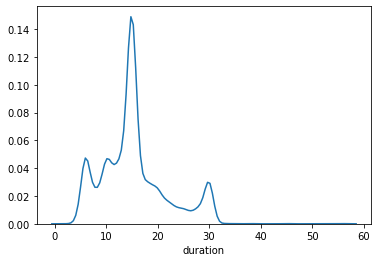

In [44]:
sns.distplot(video.duration, hist=False)

# map game feed

In [45]:
map_game_feed_native_video_assets.shape

(2796, 3)

In [46]:
map_game_feed_native_video_assets.isnull().sum()

mst_game_feed_id                         0
horizontal_mst_advertiser_video_id       0
vertical_mst_advertiser_video_id      2794
dtype: int64

In [47]:
map_game_feed_native_video_assets.head(10)

,mst_game_feed_id,horizontal_mst_advertiser_video_id,vertical_mst_advertiser_video_id
0,000f11b9d1225337a7d8,714ffeb76a9b990a460a,NaN
1,001a50dc93d000d05e98,e30c54033d5725c7b0da,NaN
2,005475e001fe479df1cd,621a4111eb2df50b6ac6,NaN
3,00645c3a0b896998c0ab,87db2dbadddc0cac8e86,NaN
4,00746b40feb00159ff42,c36e5da95059efef96b0,NaN
5,008c205e2deeeded6428,742f89fe2049e01afaff,NaN
6,009495127c80664d528b,d80ba0003a22531d57d5,NaN
7,00a75e160a6be457f462,07cce45670ae163198c3,NaN
8,00d88ba96896437bab91,c48eaa964385a390719d,NaN
9,0132d2b526695c42409b,8663899d1a92a7906290,NaN


In [48]:
map_game_feed_native_video_assets.dropna()

,mst_game_feed_id,horizontal_mst_advertiser_video_id,vertical_mst_advertiser_video_id
975,5dd3242e3a1bb99f905a,ca4da143212422c06aec,bba6a3aaa505e3694446
1893,b026b699ae7e3f81e65e,19150ba8e5f212da7a8e,1397dfa85ac6f557dafe


In [49]:
for i in map_game_feed_native_video_assets.columns:
    if video.id.unique()[1] in list(set(map_game_feed_native_video_assets[i].unique())):
        print(i)

horizontal_mst_advertiser_video_id


In [50]:
video.id.unique()[1]

'000217bb188dbc73a605'

# advertiser converted video

In [51]:
# 重複があるので削除する
advertiser_converted_video = advertiser_converted_video.drop_duplicates(subset=["mst_advertiser_video_id", "mst_game_feed_id", "mst_video_template_id"], keep="last")

In [52]:
advertiser_converted_video.head()

,mst_advertiser_video_id,mst_game_feed_id,width,height,file_size,bitrate,rectangle_type,mst_video_template_id
1,00007c2cea6e8b84d25a,NaN,960,540,2165379.0,1000000,horizontal,fd63a18641d9983bebfe
3,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,540,960,2081216.0,1000000,vertical,e3f5663bc1e2e5cc282e
6,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,540,960,2112860.0,1000000,vertical,69b22b4400be9d91e6cc
7,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,960,540,2115934.0,1000000,horizontal,280cbc5da35108febc39
10,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,540,960,2108472.0,1000000,vertical,b5401899f2db8ce48d43


In [53]:
advertiser_converted_video.shape

(107493, 8)

In [54]:
advertiser_converted_video.mst_advertiser_video_id.unique()[10]

'003d08668fb22b6a1982'

In [55]:
for i in map_game_feed_native_video_assets.columns:
    if advertiser_converted_video.mst_advertiser_video_id.unique()[12] in list(set(map_game_feed_native_video_assets[i].unique())):
        print(i)

# campaign

In [56]:
campaign.groupby(["mst_advertiser_id", "mst_user_type_id"])["id"].count().reset_index(drop=False)

,mst_advertiser_id,mst_user_type_id,id
0,00338a65a70fea29e1fd,34,1
1,00338a65a70fea29e1fd,35,1
2,00338a65a70fea29e1fd,36,1
3,00338a65a70fea29e1fd,37,1
4,00338a65a70fea29e1fd,38,1
...,...,...,...
7227,ffd2ab02de2ce773588c,34,2
7228,ffd2ab02de2ce773588c,35,2
7229,ffd2ab02de2ce773588c,36,2
7230,ffd2ab02de2ce773588c,37,2


In [57]:
campaign

,id,mst_advertiser_id,mst_advertiser_order_id,mst_user_type_id
0,000233300eee9b73e163,b0ad86b95208b2bcaa56,9e332230144cbf3c8398,40
1,0005732c3bfebf43d001,2261bdf815fdb9a29193,6af6ecac9114b64edb79,39
2,0008fe8bfb493d08dafc,ba2bb260d8eccd0057a4,e51db809d3b307ca2ba7,36
3,00136688c2541c9f504b,c9c77dde0126606b0220,18463b788223600b8600,37
4,0015789eee1d47b71a87,d9b9356e8f4c9df90b5d,f80899a466fbe47b9fce,38
...,...,...,...,...
14622,ffebe1e00669a833db23,b6adb4a99d6f48f8901c,2496f347fd68f52d4c01,38
14623,ffed896cdef582117ed1,72aff2896de7c798e150,f4d20e51b15cc71b56f4,4
14624,fffaa9f1a42aa76aef25,f6fbaaa53bc721ea22ac,85e025d09dc2bf305c80,39
14625,fffc6a78c2415e3b8aa6,fd1cace6242470215c9b,9d7f8395bdf2bc6009ea,25


In [58]:
tmp = campaign[campaign.mst_user_type_id.isin([1,2,3,4])].copy()
for i in tmp.columns:
    print(len(tmp[i].unique()))

1484
342
342
4


In [59]:
set(tmp.id) & set(train.request_id)

set()

In [60]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14627 entries, 0 to 14626
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       14627 non-null  object
 1   mst_advertiser_id        14627 non-null  object
 2   mst_advertiser_order_id  14627 non-null  object
 3   mst_user_type_id         14627 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 457.2+ KB


In [61]:
for i in campaign.columns:
    print(len(campaign[i].unique()))

14627
1381
1499
52


# all df

In [62]:
train["type"] = "train"
test["type"] = "test"
all_df = pd.concat([train, test])

#all_df.groupby("uid").agg("mean")["from_click"].values.mean()
#all_df.groupby("uid")["request_id"].count().mean()

# cumsum from click by uid
#tmp1 = all_df.groupby(['uid'])['from_click'].progress_apply(lambda x: pd.concat([pd.DataFrame([0]), x.cumsum()[:-1]])).reset_index(drop=True).values
#tmp1 = np.array(tmp1, dtype=float)
# cumsum total num by uid
#tmp2 = all_df.groupby(['uid']).cumcount().values
#tmp2 = np.array(tmp2, dtype=float).reshape(-1,1)
# https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
#from_click_ratio = np.divide(tmp1, tmp2, out=np.ones_like(tmp1)*-1, where=tmp2!=0)

In [63]:
all_df.head(20)

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,month,count,type
0,ad6a7b7894f142d81a1e,2020-04-28 00:04:14.639,0.0,4,1111,2.0,1b29c3959fc76425d130,efef8f05c293786ae95d,1.0,9ce932d55f27ed28f0e5,8497,2020-04-28 00:04:21.581000,JP,2020-04-29 00:04:05.618000,1490644.0,0,0,4,8371aa8713627e51023c,NaN,0.0,1.0,NaN,NaN,11320.0,29835.0,10.0,2607.0,NaN,1,13.3.1,0,30cfce348022c3812b3a,1,a96538aec6d5d90fd8d9,4.0,1.0,train
1,ac8453e4a93391812b78,2020-04-28 00:09:13.759,0.0,28,1081,2.0,ba2bb260d8eccd0057a4,85518c203c727a6fcd6e,2.0,23f7cf2bddc97c599ac4,0,2020-04-29 01:59:08.418000,JP,2020-04-29 10:23:18.079000,790412.0,2,1,4,b28c75eda0294ffd7924,NaN,0.0,1.0,NaN,NaN,12589.0,159596.0,2.0,13540.0,c3292411366546db2194,2,9.0.0,1,4c28854cab6a85c37dab,2,297ade72d5f1e9ed6e2f,4.0,1.0,train
2,4959adca0d9284e642c9,2020-04-28 00:09:14.708,0.0,42,1123,3.0,0aaa2635cef6c96c7932,d01b84105c697315f36d,1.0,2dde952bf6521fac0b71,0,2020-04-28 00:09:29.655000,JP,2020-04-29 00:08:42.200000,1506105.0,0,0,4,200c99de864be1a88010,953c7610a60e2543c073,NaN,NaN,80525.0,906634.0,10254.0,156643.0,9.0,33725.0,07514730ff1e69100233,1,12.1.2,0,b35f0cd7210c4273489c,1,NaN,4.0,1.0,train
3,622c44ebc7cf591d046e,2020-04-28 00:10:40.291,0.0,8,1113,2.0,1ed4e5bb950da757976a,c72faf7a97213d7e4c8c,1.0,1cbbcb2f33a045e5a09c,0,2020-04-28 00:10:50.270000,JP,2020-04-29 00:03:56.930000,184283.0,0,0,4,b98336c3d597f3d62202,NaN,NaN,1.0,NaN,NaN,39618.0,NaN,4.0,7377.0,84a2cff85228c12b0e6a,1,13.4.1,0,57dc1bf69be06dac416c,1,b5401899f2db8ce48d43,4.0,1.0,train
4,3093c6746ae6e35b9ad5,2020-04-28 00:11:45.895,0.0,22,1061,NaN,d352ebd3462849796754,0376415068bf3e5b9e95,4.0,84095859da9cffce1c60,0,2020-05-05 17:39:43.537000,JP,2020-05-05 23:56:19.105000,1999495.0,2,1,2,84ed0ed356eb339c6eaa,5f60f2a2df7efc8f339e,1.0,0.0,NaN,NaN,35652.0,1566749.0,5.0,164759.0,2fd1c330d5a47edc039b,1,12.4.5,0,7ca7b54b97093b084027,1,NaN,4.0,1.0,train
5,c186c206137afa8edadd,2020-04-28 00:12:25.497,0.0,42,1123,3.0,d352ebd3462849796754,eaa7085664dfce4888b6,1.0,4921219328fa107c5490,0,2020-04-28 00:12:38.672000,JP,2020-04-29 00:01:07.841000,848741.0,3,0,4,5dd3242e3a1bb99f905a,953c7610a60e2543c073,NaN,NaN,34603.0,NaN,19224.0,NaN,4.0,117082.0,e6f32f3303e8448e25fc,2,9,0,6d56b555c996185e7e95,2,NaN,4.0,1.0,train
6,9db8f5a8c4db2d464e7c,2020-04-28 00:15:20.468,0.0,28,1081,2.0,f43da1679dc59f23a22a,10588318ce3d7ac66f86,2.0,d03a51b4070de95e40a3,0,2020-04-28 23:17:43.111000,JP,2020-04-29 01:34:05.009000,1112050.0,8,1,4,369c69759861de48bd05,NaN,0.0,1.0,NaN,NaN,10074.0,342946.0,5.0,30641.0,f2c64b51ca3ee927f391,1,13.3.1,1,576476fe4289341a9a3c,1,e3f5663bc1e2e5cc282e,4.0,1.0,train
7,9d8690fb3ee34395bf1a,2020-04-28 00:17:21.586,0.0,28,1081,2.0,912234abcf013c9efb06,10588318ce3d7ac66f86,2.0,a8d4ab8bb594667986e8,0,2020-04-28 00:17:42.820000,JP,2020-04-29 00:14:27.119000,215483.0,2,1,4,06ad428736c1c7c301e8,NaN,0.0,1.0,NaN,NaN,3476.0,NaN,7.0,50342.0,f2c64b51ca3ee927f391,1,13.3.1,1,8327cf2a5da3228320b0,1,e3f5663bc1e2e5cc282e,4.0,1.0,train
8,de3d2d0ea6b703ddd9e7,2020-04-28 00:18:28.316,0.0,27,1073,3.0,e966db3d5806a7a6d9ea,8d2d11c37476a8f996bf,1.0,be429b89593a3ca2d0d9,0,2020-04-29 02:58:57.778000,JP,2020-04-29 06:10:28.999000,24157.0,4,0,4,a3e3c0f04fcbf76d3ab9,953c7610a60e2543c073,0.0,NaN,80156.0,NaN,20365.0,NaN,3.0,2155.0,422ccd47b1dad11682fe,1,13.3.1,0,5993ae6d6f12d01b0b55,1,NaN,4.0,1.0,train
9,6133919bd4afe40f8800,2020-04-28 00:20:22.356,0.0,26,1069,3.0,3cf5305061f9b20718e5,b899d80a93a7646dcb27,1.0,b6d52f45c15dc78e4913,0,2020-04-28 00:20:47.370000,JP,2020-04-29 00:18:24.029000,255696.0,0,0,4,9a9fe0e0d3aadb4b1c5e,NaN,NaN,0.0,NaN,NaN,75891.0,173954.0,1.0,71954.0,